# Unit 4: Data Manipulation
---

1. [Working with dates](#section1)
2. [Simple Groupby](#section2)
3. [Sorting and filtering](#section3)
4. [Two or more attributes](#section4)
5. [Multiple aggregations](#section5)
6. [Tidy up](#section6)

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Still with airport wildlife strikes. 
[Some more info on the data](https://github.com/nlihin/data-analytics/blob/main/datasets/aircraft%20wildlife%20strikes%20fieldlist.pdf)

This time data from 2018-2023. This dataset was too big to upload to Github, so I split it into two parts:\
2018-2020\
2021-2023

In [4]:
url1 = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/aircraft%20wildlife%20strikes%202018-2020.csv'
url2 = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/aircraft%20wildlife%20strikes%202021-2023.csv'
strike_df_18_20 = pd.read_csv(url1)
strike_df_21_23 = pd.read_csv(url2)

C:\Users\lihin\AppData\Local\Temp\ipykernel_42060\1453354056.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  strike_df_18_20 = pd.read_csv(url1)
C:\Users\lihin\AppData\Local\Temp\ipykernel_42060\1453354056.py:4: DtypeWarning: Columns (3,4,28) have mixed types. Specify dtype option on import or set low_memory=False.
  strike_df_21_23 = pd.read_csv(url2)


#### Combine the two files into one:
Since they have the same structure, `concat` can be used.
You will learn other options next year in DB course, but if you're curious, [look here](https://pandas.pydata.org/docs/user_guide/merging.html)

In [5]:
strike_df = pd.concat([strike_df_18_20 ,strike_df_21_23]).reset_index()
strike_df

,index,INCIDENT_DATE,TIME_OF_DAY,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,...,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,SOURCE,PERSON
0,0,01/01/2018,NaN,SARASOTA-BRADENTON INTL ARPT,27.39533,-82.55411,32,FL,ASO,NaN,...,0,Unknown,NaN,1,Small,NaN,NaN,NaN,FAA Form 5200-7-E,Carcass Found
1,1,01/01/2018,NaN,BILL AND HILLARY CLINTON NATL ARPT/ADAMS FIELD,34.7294,-92.22425,22R,AR,ASW,NaN,...,0,No,NaN,1,Small,NaN,NaN,NaN,FAA Form 5200-7-E,Carcass Found
2,2,01/01/2018,NaN,QUAD CITY ARPT,41.44853,-90.50754,27,IL,AGL,NaN,...,0,Unknown,NaN,1,Small,NaN,NaN,NaN,FAA Form 5200-7-E,Carcass Found
3,3,01/01/2018,Night,LONG BEACH-DAUGH FLD,33.81772,-118.15161,30,CA,AWP,NaN,...,0,Unknown,NaN,1,Small,NaN,NaN,NaN,FAA Form 5200-7-E,Carcass Found
4,4,01/01/2018,NaN,SALT LAKE CITY INTL,40.78839,-111.97777,NaN,UT,ANM,NaN,...,0,Unknown,NaN,1,Small,NaN,NaN,NaN,FAA Form 5200-7-E,Carcass Found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97616,52453,31/12/2023,Day,EXECUTIVE ARPT,28.54547,-81.33294,NaN,FL,ASO,NaN,...,1,Unknown,1,1,Large,NaN,NaN,NaN,Multiple,Pilot
97617,52454,31/12/2023,Night,NASHVILLE INTL,36.12448,-86.67818,2R,TN,ASO,NaN,...,1,Yes,1,1,Large,NaN,NaN,NaN,Multiple,Pilot
97618,52455,31/12/2023,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,FOUND KCSG,...,0,Unknown,NaN,1,NaN,NaN,NaN,NaN,FAA Form 5200-7-E,Airport Operations
97619,52456,31/12/2023,Day,DANIEL K. INOUYE INTERNATIONAL AIRPORT,21.31869,-157.92241,8L,HI,AWP,NaN,...,0,Yes,1,1,Small,NaN,NaN,NaN,Multiple,Airport Operations


Note: `reset_index` is important here, or else you get the formar indices from both datasets (and then have multiple rows witht the same index). `drop=True` means we don't want to keep the formar index as a column

### <span style="color:blue"> Exercise:</span>
> 
> How do you suggest to check that the files have been combined? (Sanity check)

In [6]:
len(strike_df_18_20)

45163

In [7]:
len(strike_df_21_23)

52458

In [8]:
len(strike_df)

97621

<a id='section1'></a>
## 1. Working with dates

We have a cell that holds the dates:

In [4]:
strike_df[['INCIDENT_DATE']].tail()

,INCIDENT_DATE
97616,31/12/2023
97617,31/12/2023
97618,31/12/2023
97619,31/12/2023
97620,31/12/2023


But it's currently of type object:

In [5]:
strike_df[['INCIDENT_DATE']].dtypes

INCIDENT_DATE    object
dtype: object

We will change 'INCIDENT_DATE' into a `datetime` object 

In [13]:
strike_df['date'] = pd.to_datetime(strike_df['INCIDENT_DATE'],format='%d/%m/%Y')

Did it work?

In [12]:
strike_df[['date']].dtypes

date    datetime64[ns]
dtype: object

In [8]:
strike_df[['date','INCIDENT_DATE']]

,date,INCIDENT_DATE
0,2018-01-01,01/01/2018
1,2018-01-01,01/01/2018
2,2018-01-01,01/01/2018
3,2018-01-01,01/01/2018
4,2018-01-01,01/01/2018
...,...,...
97616,2023-12-31,31/12/2023
97617,2023-12-31,31/12/2023
97618,2023-12-31,31/12/2023
97619,2023-12-31,31/12/2023


Extract the month:

In [14]:
strike_df['month'] = pd.DatetimeIndex(strike_df['date']).month

In [16]:
strike_df.loc[1000:1010,['date','month','struck_parts','SPECIES']]

,date,month,struck_parts,SPECIES
1000,2018-03-06,3,0,Rough-legged hawk
1001,2018-03-06,3,1,Unknown bird - small
1002,2018-03-06,3,1,Short-eared owl
1003,2018-03-06,3,1,Horned lark
1004,2018-03-06,3,1,American kestrel
1005,2018-03-06,3,1,Brazilian free-tailed bat
1006,2018-03-06,3,1,Short-eared owl
1007,2018-03-06,3,1,Blue-winged teal
1008,2018-03-06,3,1,Unknown bird
1009,2018-03-06,3,1,Gulls


You can use any combination [from here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

Another example:

In [11]:
strike_df['year-month'] = pd.DatetimeIndex(strike_df['date']).strftime('%Y-%m')
strike_df[["year-month",'date']].iloc[10:12]

,year-month,date
10,2018-01,2018-01-01
11,2018-01,2018-01-01


### <span style="color:blue"> Exercise:</span>
> Extract the `year` and add it as a new column called `year` in `strike_df`
>
> Extract the name of the day and add it as a new column called `weekday` in `strike_df`
>
> Run the sanity check: `strike_df[["date","year","weekday"]]` 

In [58]:
x =strike_df[(strike_df["weekday"]=="Friday") & (strike_df["SIZE"] == "Large")]
x["OPERATOR"].value_counts().values[1]
#x.columns

138

In [15]:
strike_df["year"] = pd.DatetimeIndex(strike_df['date']).year

In [21]:
strike_df["weekday"] = pd.DatetimeIndex(strike_df['date']).strftime('%A')

In [28]:
top_day = strike_df['weekday'].value_counts().index[0]
top_day

'Thursday'

In [24]:
strike_df[strike_df["weekday"]=="Monday"]

,index,INCIDENT_DATE,TIME_OF_DAY,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,...,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,SOURCE,PERSON,date,month,year,weekday
0,0,01/01/2018,NaN,SARASOTA-BRADENTON INTL ARPT,27.39533,-82.55411,32,FL,ASO,NaN,...,Small,NaN,NaN,NaN,FAA Form 5200-7-E,Carcass Found,2018-01-01,1,2018,Monday
1,1,01/01/2018,NaN,BILL AND HILLARY CLINTON NATL ARPT/ADAMS FIELD,34.7294,-92.22425,22R,AR,ASW,NaN,...,Small,NaN,NaN,NaN,FAA Form 5200-7-E,Carcass Found,2018-01-01,1,2018,Monday
2,2,01/01/2018,NaN,QUAD CITY ARPT,41.44853,-90.50754,27,IL,AGL,NaN,...,Small,NaN,NaN,NaN,FAA Form 5200-7-E,Carcass Found,2018-01-01,1,2018,Monday
3,3,01/01/2018,Night,LONG BEACH-DAUGH FLD,33.81772,-118.15161,30,CA,AWP,NaN,...,Small,NaN,NaN,NaN,FAA Form 5200-7-E,Carcass Found,2018-01-01,1,2018,Monday
4,4,01/01/2018,NaN,SALT LAKE CITY INTL,40.78839,-111.97777,NaN,UT,ANM,NaN,...,Small,NaN,NaN,NaN,FAA Form 5200-7-E,Carcass Found,2018-01-01,1,2018,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97519,52356,25/12/2023,Day,CITY OF COLORADO SPRINGS MUNI APRT,38.80581,-104.70025,35R,CO,ANM,NaN,...,Small,NaN,NaN,NaN,Multiple,Airport Operations,2023-12-25,12,2023,Monday
97520,52357,25/12/2023,Night,MAHLON SWEET FLD,44.12326,-123.21869,16R,OR,ANM,NaN,...,Medium,NaN,NaN,NaN,Multiple,Pilot,2023-12-25,12,2023,Monday
97521,52358,25/12/2023,NaN,LIHUE ARPT,21.97598,-159.33896,35,HI,AWP,NaN,...,NaN,NaN,NaN,NaN,MOR,Tower,2023-12-25,12,2023,Monday
97522,52359,25/12/2023,Night,BRADLEY INTL,41.93887,-72.68323,6,CT,ANE,NaN,...,Small,NaN,NaN,NaN,Multiple,Airport Operations,2023-12-25,12,2023,Monday


In [26]:
# sanity check
strike_df[["date","year","weekday"]]

,date,year,weekday
0,2018-01-01,2018,Monday
1,2018-01-01,2018,Monday
2,2018-01-01,2018,Monday
3,2018-01-01,2018,Monday
4,2018-01-01,2018,Monday
...,...,...,...
97616,2023-12-31,2023,Sunday
97617,2023-12-31,2023,Sunday
97618,2023-12-31,2023,Sunday
97619,2023-12-31,2023,Sunday


<a id='section2'></a>
## 2. Simple groupby

[from pandas user guide:](https://pandas.pydata.org/docs/user_guide/groupby.html)\
By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria.

* Applying a function to each group independently.

* Combining the results into a data structure.



In [16]:
grouped = strike_df.groupby('month')
grouped

The above split the data into groups\
Nothing happens here, since we didn't indicate what to do with each group\
But: no error. The split is valid :-)

Now lets perform a split and then an apply of an aggregation function

Count the number of species that are encountered each month:

In [20]:
strike_df["SPECIES"]

0                      Killdeer
1                      Killdeer
2                 Mourning dove
3           Semipalmated plover
4        Eurasian collared dove
                  ...          
97616             Black vulture
97617             Black vulture
97618              Unknown bird
97619     Pacific golden-plover
97620              Unknown bird
Name: SPECIES, Length: 97621, dtype: object

In [22]:
strike_df.columns

Index(['index', 'INCIDENT_DATE', 'TIME_OF_DAY', 'AIRPORT', 'LATITUDE',
       'LONGITUDE', 'RUNWAY', 'STATE', 'FAAREGION', 'LOCATION', 'OPERATOR',
       'AIRCRAFT', 'AC_CLASS', 'AC_MASS', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED',
       'DISTANCE', 'SKY', 'PRECIPITATION', 'AircraftOutOfService',
       'INGESTED_OTHER', 'INDICATED_DAMAGE', 'DAMAGE_LEVEL', 'struck_parts',
       'damaged_parts', 'OTHER_SPECIFY', 'EFFECT', 'EFFECT_OTHER',
       'BIRD_BAND_NUMBER', 'SPECIES', 'OUT_OF_RANGE_SPECIES', 'REMARKS',
       'REMAINS_COLLECTED', 'REMAINS_SENT', 'WARNED', 'NUM_SEEN', 'NUM_STRUCK',
       'SIZE', 'ENROUTE_STATE', 'NR_INJURIES', 'NR_FATALITIES', 'SOURCE',
       'PERSON', 'people_impact', 'date', 'month', 'year'],
      dtype='object')

In [24]:
med_df = strike_df.groupby('month')[['WARNED']].count() 
med_df

,WARNED
month,
1,2723
2,2872
3,4379
4,6584
5,9625
6,8123
7,12781
8,14267
9,13544


In [26]:
#med_df[["month"]]

Note that this format means `month` is now the index

this means `strike_df[["month"]]` won't work anymore

##### If you plan to continue using this data and need the index as an attribute:

##### add `reset_index()` and then assign

In [29]:
med_df = med_df.reset_index()
med_df

,month,WARNED
0,1,2723
1,2,2872
2,3,4379
3,4,6584
4,5,9625
5,6,8123
6,7,12781
7,8,14267
8,9,13544
9,10,12803


In [30]:
med_df["month"]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: month, dtype: int64

sum some data:

In [8]:
strike_df["people_impact"] = strike_df[['NR_INJURIES', 'NR_FATALITIES']].sum(axis=1)

### <span style="color:blue"> Exercise:</span>
> What is the total number of people impacted (the `people_impact`) in each month?
>
> What is the mean (average) of people impacted (the `people_impact`) each year?


In [36]:
strike_df.groupby("month")[["people_impact"]].sum()

,people_impact
month,
1,4.0
2,4.0
3,2.0
4,6.0
5,3.0
6,1.0
7,3.0
8,1.0
9,9.0


In [33]:
strike_df.groupby("year")[["people_impact"]].mean()

,people_impact
year,
2018,0.000802
2019,0.000577
2020,0.000172
2021,0.000703
2022,0.000349
2023,0.000561


Now let's see these on a graph:

<AxesSubplot: xlabel='year', ylabel='people_impact'>

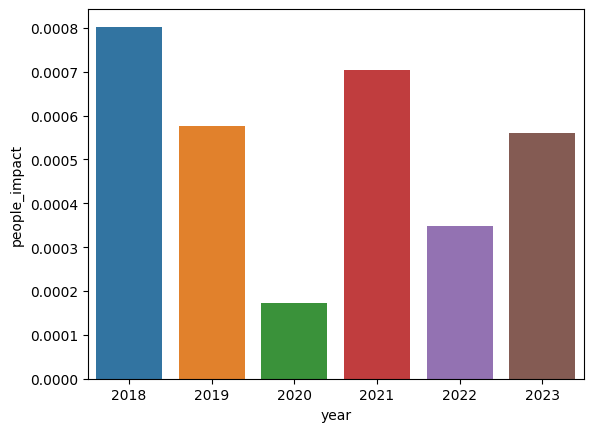

In [35]:
strike_df['year'] = pd.DatetimeIndex(strike_df['date']).year
sns.barplot(data=strike_df, y ='people_impact', x = 'year',errorbar=None)

<AxesSubplot: xlabel='month', ylabel='people_impact'>

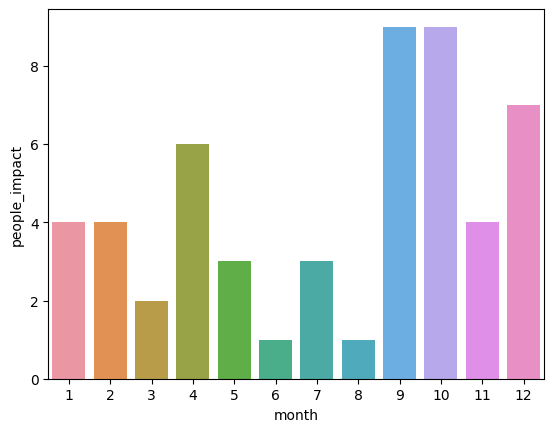

In [38]:
sns.barplot(data=strike_df, y ='people_impact', x = 'month',estimator = sum,  errorbar=None)

<a id='section3'></a>
## 3. Sorting and filtering

Which bird species impacted people (by injuring or killing them)? How many cases were there?

In [40]:
strike_df.groupby(['SPECIES'])[['people_impact']].sum()\
                                                 .reset_index()\
                                                 .sort_values(by="people_impact")

,SPECIES,people_impact
0,Acadian flycatcher,0.0
632,Pigeons,0.0
633,"Pigeons, doves",0.0
634,Pine siskin,0.0
635,Pine warbler,0.0
...,...,...
53,Bald eagle,3.0
35,American white pelican,3.0
179,Canada goose,3.0
833,Turkey vulture,4.0


Most birds don't impact people. Filter out those who don't using `Filter`\
and then groupby again. You need to groupby twice:
* for the filter
* for the result after the filter

In [41]:
bird_df = strike_df.groupby('SPECIES').filter(lambda x: x['people_impact'].sum() > 0) \
                            .groupby('SPECIES')[['people_impact']].sum() \
                            .reset_index() \
                            .sort_values(by="people_impact", ascending = False ) 
#bird_df = bird_df.reset_index(drop = True)
bird_df

,SPECIES,people_impact
23,Unknown bird,9.0
22,Turkey vulture,4.0
8,Canada goose,3.0
5,Bald eagle,3.0
18,Red-tailed hawk,3.0
2,American white pelican,3.0
26,White-tailed deer,2.0
9,Cattle egret,2.0
11,Green-winged teal,2.0
13,Hawks,2.0


another way to reach the same result, no filter:

In [ ]:
bird_df = strike_df.groupby('SPECIES')[['people_impact']].sum() \
                            .reset_index() \
                            .sort_values(by="people_impact", ascending = False )\
                            .query('people_impact > 0')
bird_df

We cannot plot this figure without performing the groupby (and some sort of filter) first:

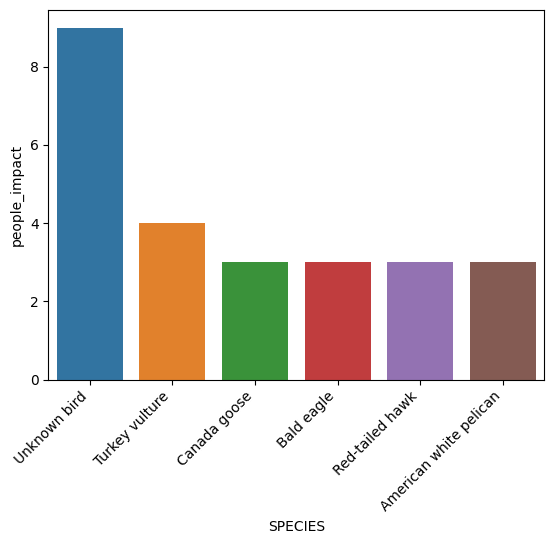

In [53]:
sns.barplot(data = bird_df.head(6), x = "SPECIES", y = "people_impact")
plt.xticks(rotation=45, ha='right')
plt.show()

<a id='section4'></a>
## 4. Groupby on two or more attributes

Now, groupby `month` and `year`

In [54]:
strike_grpd = strike_df.groupby(['month','year'])[['people_impact', 'struck_parts']].sum()\
.reset_index()
strike_grpd

,month,year,people_impact,struck_parts
0,1,2018,0.0,343
1,1,2019,3.0,382
2,1,2020,0.0,356
3,1,2021,1.0,313
4,1,2022,0.0,316
...,...,...,...,...
67,12,2019,1.0,467
68,12,2020,0.0,326
69,12,2021,2.0,485
70,12,2022,2.0,550


### <span style="color:blue"> Exercise:</span>
> 
> 1. what will happen if we switch the order of the indexes: `['month', 'year']`?
>
> 2. Create a barplot for x="year", y="people_impact", alongside the lineplot (see the help below)

In [56]:
strike_df.groupby(['year', 'month'])[['people_impact', 'struck_parts']].sum()\
.reset_index()

,year,month,people_impact,struck_parts
0,2018,1,0.0,343
1,2018,2,0.0,373
2,2018,3,2.0,551
3,2018,4,0.0,980
4,2018,5,2.0,1450
...,...,...,...,...
67,2023,8,0.0,2033
68,2023,9,3.0,2193
69,2023,10,2.0,2343
70,2023,11,2.0,1205


Some help with 2:

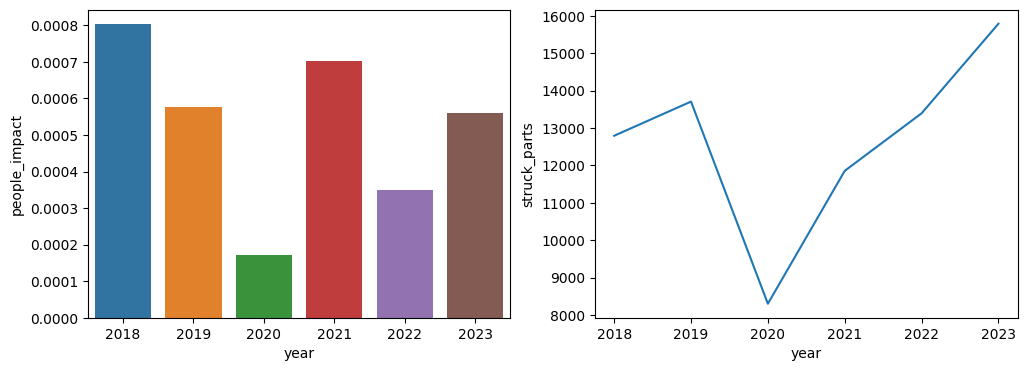

In [57]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=2)
sns.barplot(data=strike_df,errorbar=None, x="year", y="people_impact",  ax = axes[0])
sns.lineplot(x="year", y="struck_parts",  data=strike_df,errorbar=None, estimator = sum, ax=axes[1])
plt.show()

<a id='section5'></a>
## 5. Multiple aggregations

In [6]:
strike_df['TIME_OF_DAY'].unique()

array([nan, 'Night', 'Day', 'Dusk', 'Dawn'], dtype=object)

In [12]:
strike_group = strike_df.groupby('TIME_OF_DAY').\
agg({'people_impact': ['mean', 'median', 'max'], 'TIME_OF_DAY':['count'], 'AircraftOutOfService':['first', 'last', 'mean']})

strike_group = strike_group.reset_index()
strike_group

TIME_OF_DAY people_impact             TIME_OF_DAY AircraftOutOfService  \
                       mean median  max       count                first   
0        Dawn      0.001114    0.0  2.0        1796                  1.0   
1         Day      0.001139    0.0  3.0       28983                 96.0   
2        Dusk      0.000441    0.0  1.0        2270                 96.0   
3       Night      0.001065    0.0  2.0       15028                  1.0   

                     
    last       mean  
0   14.0  14.239535  
1  800.0  45.222238  
2   15.0  49.514976  
3    2.0  34.153840

<a id='section6'></a>
## 6. Tidy your output

If you want to access the data and not deal with a multi-index, flatten the data by dropping a level and rename the columns:

In [13]:
strike_group.columns

MultiIndex([(         'TIME_OF_DAY',       ''),
            (       'people_impact',   'mean'),
            (       'people_impact', 'median'),
            (       'people_impact',    'max'),
            (         'TIME_OF_DAY',  'count'),
            ('AircraftOutOfService',  'first'),
            ('AircraftOutOfService',   'last'),
            ('AircraftOutOfService',   'mean')],
           )

Each column currently has a multi-index, that is - several levels (two levels in our case).
We use [droplevel](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.droplevel.html) to remove one of the indexes.\
`droplevel(level, axis=0)`\
`level` - the position of the index to drop. The topmost or leftmost index is 0.\
`axis` - 0 removes a level in the columns, 1 removes a level in the rows.\
In our case, we have two rows of index, so `axis = 1`.

In [14]:
strike_group = strike_group.droplevel(0, axis=1) 
strike_group

,,mean,median,max,count,first,last,mean
0,Dawn,0.001114,0.0,2.0,1796,1.0,14.0,14.239535
1,Day,0.001139,0.0,3.0,28983,96.0,800.0,45.222238
2,Dusk,0.000441,0.0,1.0,2270,96.0,15.0,49.514976
3,Night,0.001065,0.0,2.0,15028,1.0,2.0,34.153840


Rename the columns

In [15]:
strike_group.columns = ['time of day','impact_mean','impact_median','impact_max','time_of_day_count','AOS_first','AOS_last','AOS_mean']
strike_group

,time of day,impact_mean,impact_median,impact_max,time_of_day_count,AOS_first,AOS_last,AOS_mean
0,Dawn,0.001114,0.0,2.0,1796,1.0,14.0,14.239535
1,Day,0.001139,0.0,3.0,28983,96.0,800.0,45.222238
2,Dusk,0.000441,0.0,1.0,2270,96.0,15.0,49.514976
3,Night,0.001065,0.0,2.0,15028,1.0,2.0,34.153840


# Save as a pickle

In [16]:
strike_df.to_pickle("pickled_strike")

Read the file:

In [17]:
strike_df = pd.read_pickle("pickled_strike")

Pickling the file allows us to save it with all of the changes we made in python. It is also supposed to be faster to read&write

# Summary:


---

>* `concat()` - combine dataframes with overlapping columns [documentation](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
>
>* `dtypes` - returns the data type of a series (a column in a dataframe)
>
>* `pd.to_datetime(df['date'])` - changes the attribute type to datetime
>
>* `pd.DatetimeIndex(df['date']).month` - extracts the month from the datatime attribute
>
>*  `pd.DatetimeIndex(strike_df['date']).strftime('%y-%m-%w')` - create a string representing the time. use %y, %a, %A etc..  
>
>* `groupby()` - group according to the columns specified
>
>* `reset_index()` reset index to a numerical index beginning at 0
>
>* `apply` - applies a function on each row (axis =0) in the dataframe. Change to (axis = 1) to apply the function on each column [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)
>
>* `lambda` - small anonymous function
>
>* `agg` - apply multiple functions at once, one for each specified column [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
>
>* `unstack` - unstack the inner-most index onto a column
>
>* `droplevel(0, axis = 1)` - drops the highest (first) level in the column index of a multi-index dataframe
>
---

#### This was a lot of information.

#### Keep your balance. Practice. You will make it.

<div>
<img src="https://raw.githubusercontent.com/nlihin/data-analytics/main/images/balance.jpg" width="500"/>
</div>

Photo by <a href="https://unsplash.com/@martinsanchez?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Martin Sanchez</a> on <a href="https://unsplash.com/s/photos/perfect-balance?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  